In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import StandardScaler
import os
from pprint import pprint
import pandas as pd

os.chdir('../')
from utils.custom_utils import read_from_pickle, save_to_pickle
from utils.plot_utils import print_output_log, plot_pearson_corr

/Users/maitreyeesharma/WORKSPACE/PostDoc/Chemistry/SPIRAL/codes/Seq-AE/nested_ae


In [2]:
# Tick parameters
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10
mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['xtick.major.width'] = 1
mpl.rcParams['xtick.minor.size'] = 5
mpl.rcParams['xtick.minor.width'] = 1
mpl.rcParams['ytick.major.size'] = 5
mpl.rcParams['ytick.major.width'] = 1
mpl.rcParams['ytick.minor.size'] = 5
mpl.rcParams['ytick.minor.width'] = 1

plt.rcParams['axes.labelsize'] = 10
plt.rcParams['axes.titlesize'] = 10
plt.rcParams['legend.fontsize'] = 15

### Single NestedAE plots 

In [58]:
input_start_col_ae1 = 0
input_end_col_ae1 = 3
input_start_col_ae2 = 4
input_end_col_ae2 = 12

latent_size_ae1 = 2
latent_size_ae2 = 5
latent_size_single = 5

# Input data path
path = '/Users/maitreyeesharma/WORKSPACE/PostDoc/Chemistry/SPIRAL/codes/Seq-AE/datasets/synthetic_dataset/synthetic_data.csv'
df = pd.read_csv(path).to_numpy()
inputs1=df[:,input_start_col_ae1:input_end_col_ae1+1]

# Nested AE input
data_folder = '/Users/maitreyeesharma/WORKSPACE/PostDoc/Chemistry/SPIRAL/codes/Seq-AE/datasets/synthetic_dataset/'
run_folder = '/Users/maitreyeesharma/WORKSPACE/PostDoc/Chemistry/SPIRAL/codes/Seq-AE/runs/F_seed_40/'
latent_file_ae1 = run_folder + 'encoder_ae1/submodule_outputs/train/encoder_output.csv'
latent_file_ae2 = run_folder + 'encoder_ae2/submodule_outputs/train/encoder_output.csv'
dataset_file = data_folder + 'synthetic_data.csv'
latents_ae1 = pd.read_csv(latent_file_ae1, header=None, skiprows=None).to_numpy()
latents_ae2 = pd.read_csv(latent_file_ae2, header=None, skiprows=None).to_numpy()

# Adding latents of AE1 to inputs of second nested AE
d = {}
for i in range(input_start_col_ae2,input_end_col_ae2+1):
    d['input_'+str(i)] = df[:,i]

for i in range(0,latent_size_ae1):
    d['latents'+str(i)] = latents_ae1[:,i]
    
df1 = pd.DataFrame(data=d)
inputs2=df1.to_numpy()

# Single AE for all functions
inputs_single = df[:,0:13]
run_folder_single = '/Users/maitreyeesharma/WORKSPACE/PostDoc/Chemistry/SPIRAL/codes/Seq-AE/runs/F_singleAE_seed_40/'
latent_file_single = run_folder_single + 'encoder_single/submodule_outputs/train/encoder_output.csv'
latents_single = pd.read_csv(latent_file_single, header=None, skiprows=None)


FileNotFoundError: [Errno 2] No such file or directory: '/Users/maitreyeesharma/WORKSPACE/PostDoc/Chemistry/SPIRAL/codes/Seq-AE/runs/F_seed_40/encoder_ae2/submodule_outputs/train/encoder_output.csv'

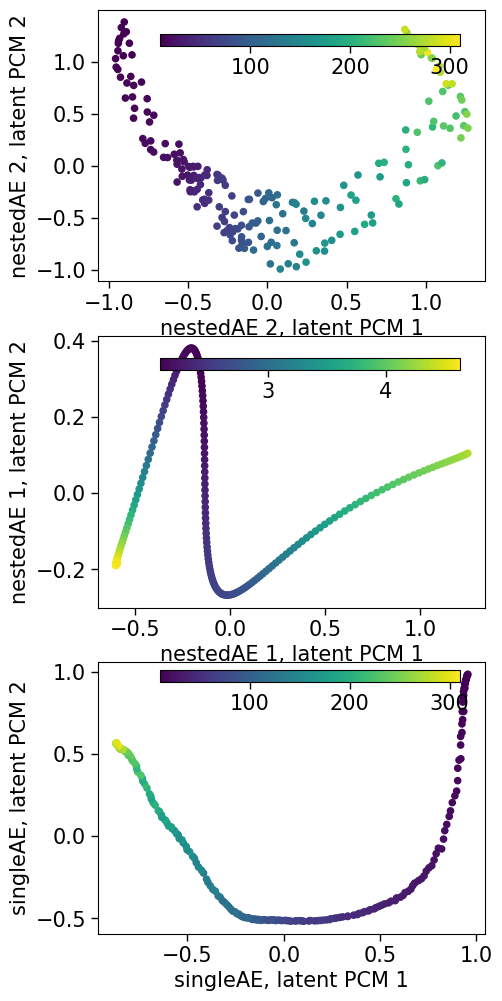

In [59]:
# PCA of latents: 
pca_2D = PCA(n_components=latent_size_ae1)
latents1_pca = pca_2D.fit_transform(latents_ae1)

pca_2D = PCA(n_components=latent_size_ae2)
latents2_pca = pca_2D.fit_transform(latents_ae2)

pca_2D = PCA(n_components=latent_size_single)
latents_single_pca = pca_2D.fit_transform(latents_single)

# Color map for plots
c1 = np.linalg.norm(inputs1, axis=1)
c2 = np.linalg.norm(inputs2, axis=1)[0:198]
c_single = np.linalg.norm(inputs_single, axis=1)

# Figure
fig, ax = plt.subplots(3, figsize=(5,12))

latent2D_2 = ax[0].scatter(latents2_pca[:,0], latents2_pca[:,1], marker='.', c=c2, s=80)
ax[0].set_xlabel('nestedAE 2, latent PCM 1',size=15)
ax[0].set_ylabel('nestedAE 2, latent PCM 2',size=15)

latent2D_1 = ax[1].scatter(latents1_pca[:,0], latents1_pca[:,1], marker='.', c=c1, s=80)
ax[1].set_xlabel('nestedAE 1, latent PCM 1',size=15)
ax[1].set_ylabel('nestedAE 1, latent PCM 2',size=15)

# latent2D_1 = ax[1].scatter(range(0,np.size(latents1_pca[:,0])), latents1_pca[:,0], marker='.', c=c1, s=80)
# ax[1].set_xlabel('nestedAE 1, index number',size=15)
# ax[1].set_ylabel('nestedAE 1, latent PCM 1',size=15)

latent2D_single = ax[2].scatter(latents_single_pca[0:199,0], latents_single_pca[0:199,1], marker='.', c=c_single, s=80)
ax[2].set_xlabel('singleAE, latent PCM 1',size=15)
ax[2].set_ylabel('singleAE, latent PCM 2',size=15)


cax1 = fig.add_axes([0.25, 0.85, 0.6, 0.01])  
if cax1:
    fig.colorbar(latent2D_2, cax=cax1, orientation='horizontal')
    
cax2 = fig.add_axes([0.25, 0.58, 0.6, 0.01])  
if cax1:
    fig.colorbar(latent2D_1, cax=cax2, orientation='horizontal')
    
cax3 = fig.add_axes([0.25, 0.32, 0.6, 0.01])
if cax2:
    fig.colorbar(latent2D_single, cax=cax3, orientation='horizontal')


In [60]:
# # PCA of latents:
# pca_2D = PCA(n_components=latent_size_ae1)
# latents1_pca = pca_2D.fit_transform(latents_ae1)

# pca_2D = PCA(n_components=latent_size_ae2)
# latents2_pca = pca_2D.fit_transform(latents_ae2)


# # PCA for inputs
# n_modes = input_end_col_ae1-input_start_col_ae1
# pca_2D = PCA(n_components=n_modes)
# inputs1_pca = pca_2D.fit_transform(inputs1)

# n_modes = latent_size_ae1+input_end_col_ae2-input_start_col_ae2+1
# pca_2D = PCA(n_components=n_modes)
# inputs2_pca = pca_2D.fit_transform(inputs2)


# # Figure: Inputs and Latents for AE1
# c1 = np.linalg.norm(inputs1, axis=1)
# fig, ax = plt.subplots(2, figsize=(10,10))

# inputs_1 = ax[0].scatter(inputs1_pca[:,0], inputs1_pca[:,1], marker='.', c=c1, s=80)
# ax[0].set_xlabel('nestedAE , input PCM 1',size=15)
# ax[0].set_ylabel('nestedAE , input PCM 2',size=15)

# # latent2D_1 = ax[1].scatter(latents1_pca[:,0], latents1_pca[:,1], marker='.', c=c1, s=80)
# # ax[1].set_xlabel('nestedAE , latent PCM 1',size=15)
# # ax[1].set_ylabel('nestedAE , latent PCM 2',size=15)

# latent2D_1 = ax[1].scatter(range(0,np.size(latents1_pca[:,0])), latents1_pca[:,0], marker='.', c=c1, s=80)
# ax[1].set_xlabel('nestedAE 1, index number',size=15)
# ax[1].set_ylabel('nestedAE 1, latent PCM 1',size=15)

# cax1 = fig.add_axes([0.25, 0.85, 0.6, 0.01])  
# if cax1:
#     fig.colorbar(inputs_1, cax=cax1, orientation='horizontal')
    
# cax2 = fig.add_axes([0.25, 0.44, 0.6, 0.01])  
# if cax1:
#     fig.colorbar(latent2D_1, cax=cax2, orientation='horizontal')

    
# # Figure: Inputs and Latents for AE2
# c2 = np.linalg.norm(inputs2, axis=1)
# fig, ax = plt.subplots(2, figsize=(10,10))

# inputs_2 = ax[0].scatter(inputs2_pca[:,0], inputs2_pca[:,1], marker='.', c=c2, s=80)
# ax[0].set_xlabel('nestedAE 2, input PCM 1',size=15)
# ax[0].set_ylabel('nestedAE 2, input PCM 2',size=15)

# latent2D_2 = ax[1].scatter(latents2_pca[:,0], latents2_pca[:,1], marker='.', c=c2, s=80)
# ax[1].set_xlabel('nestedAE 2, latent 1',size=15)
# ax[1].set_ylabel('nestedAE 2, latent 2',size=15)


# cax1 = fig.add_axes([0.25, 0.85, 0.6, 0.01])  
# if cax1:
#     fig.colorbar(inputs_2, cax=cax1, orientation='horizontal')
    
# cax2 = fig.add_axes([0.25, 0.44, 0.6, 0.01])  
# if cax1:
#     fig.colorbar(latent2D_2, cax=cax2, orientation='horizontal')



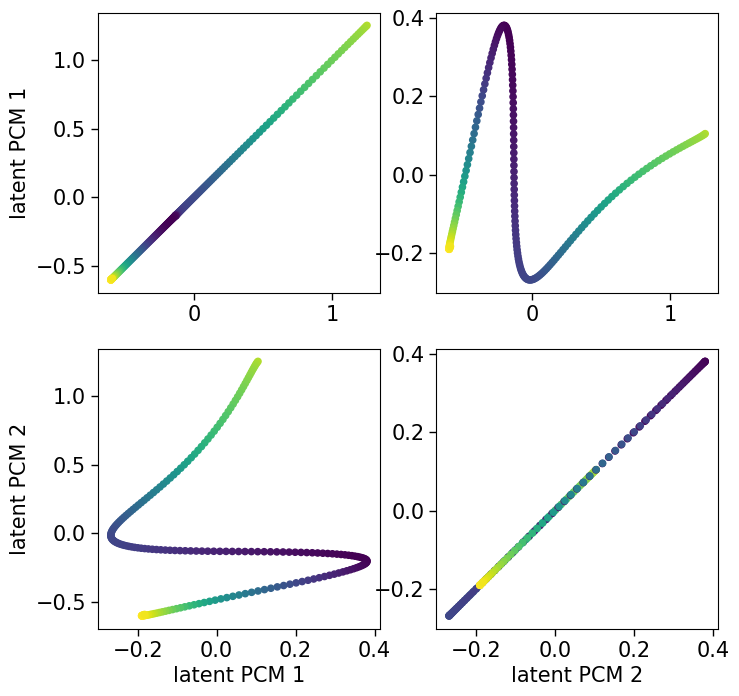

In [61]:
# PCA of latents: 
pca_2D = PCA(n_components=latent_size_ae1)
latents1_pca = pca_2D.fit_transform(latents_ae1)

# Color map for plots
c2 = np.linalg.norm(inputs1, axis=1)[0:199]

# Figure
fig, ax = plt.subplots(latent_size_ae1,latent_size_ae1, figsize=(8,8))

for i in range(0,latent_size_ae1):
    for j in range(0,latent_size_ae1):
        latent2D_2 = ax[i][j].scatter(latents1_pca[:,i], latents1_pca[:,j], marker='.', c=c2, s=80)
        if (i==latent_size_ae1-1):
            ax[latent_size_ae1-1][j].set_xlabel('latent PCM '+str(j+1),size=15)
    ax[i][0].set_ylabel('latent PCM '+str(i+1),size=15)


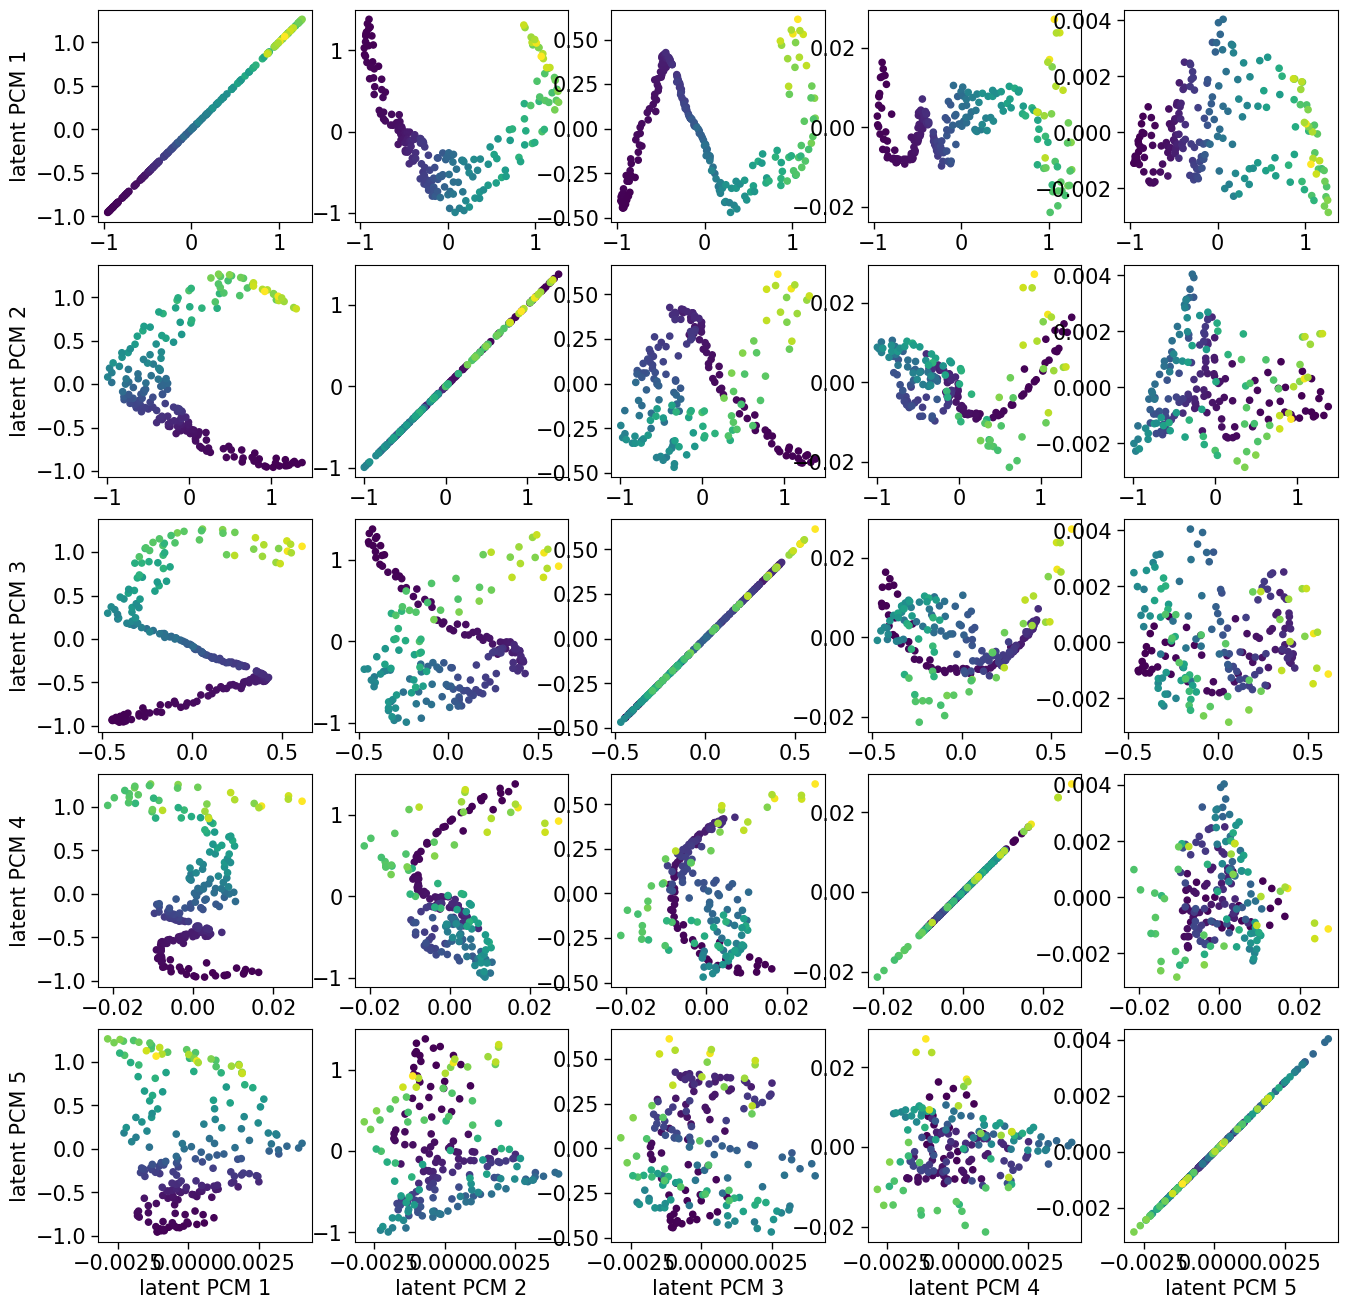

In [62]:
# PCA of latents: 
pca_2D = PCA(n_components=latent_size_ae2)
latents2_pca = pca_2D.fit_transform(latents_ae2)

# Color map for plots
c2 = np.linalg.norm(inputs2, axis=1)[0:198]

# Figure
fig, ax = plt.subplots(latent_size_ae2,latent_size_ae2, figsize=(16,16))

for i in range(0,latent_size_ae2):
    for j in range(0,latent_size_ae2):
        latent2D_2 = ax[i][j].scatter(latents2_pca[:,i], latents2_pca[:,j], marker='.', c=c2, s=80)
        if (i==latent_size_ae2-1):
            ax[latent_size_ae2-1][j].set_xlabel('latent PCM '+str(j+1),size=15)
    ax[i][0].set_ylabel('latent PCM '+str(i+1),size=15)


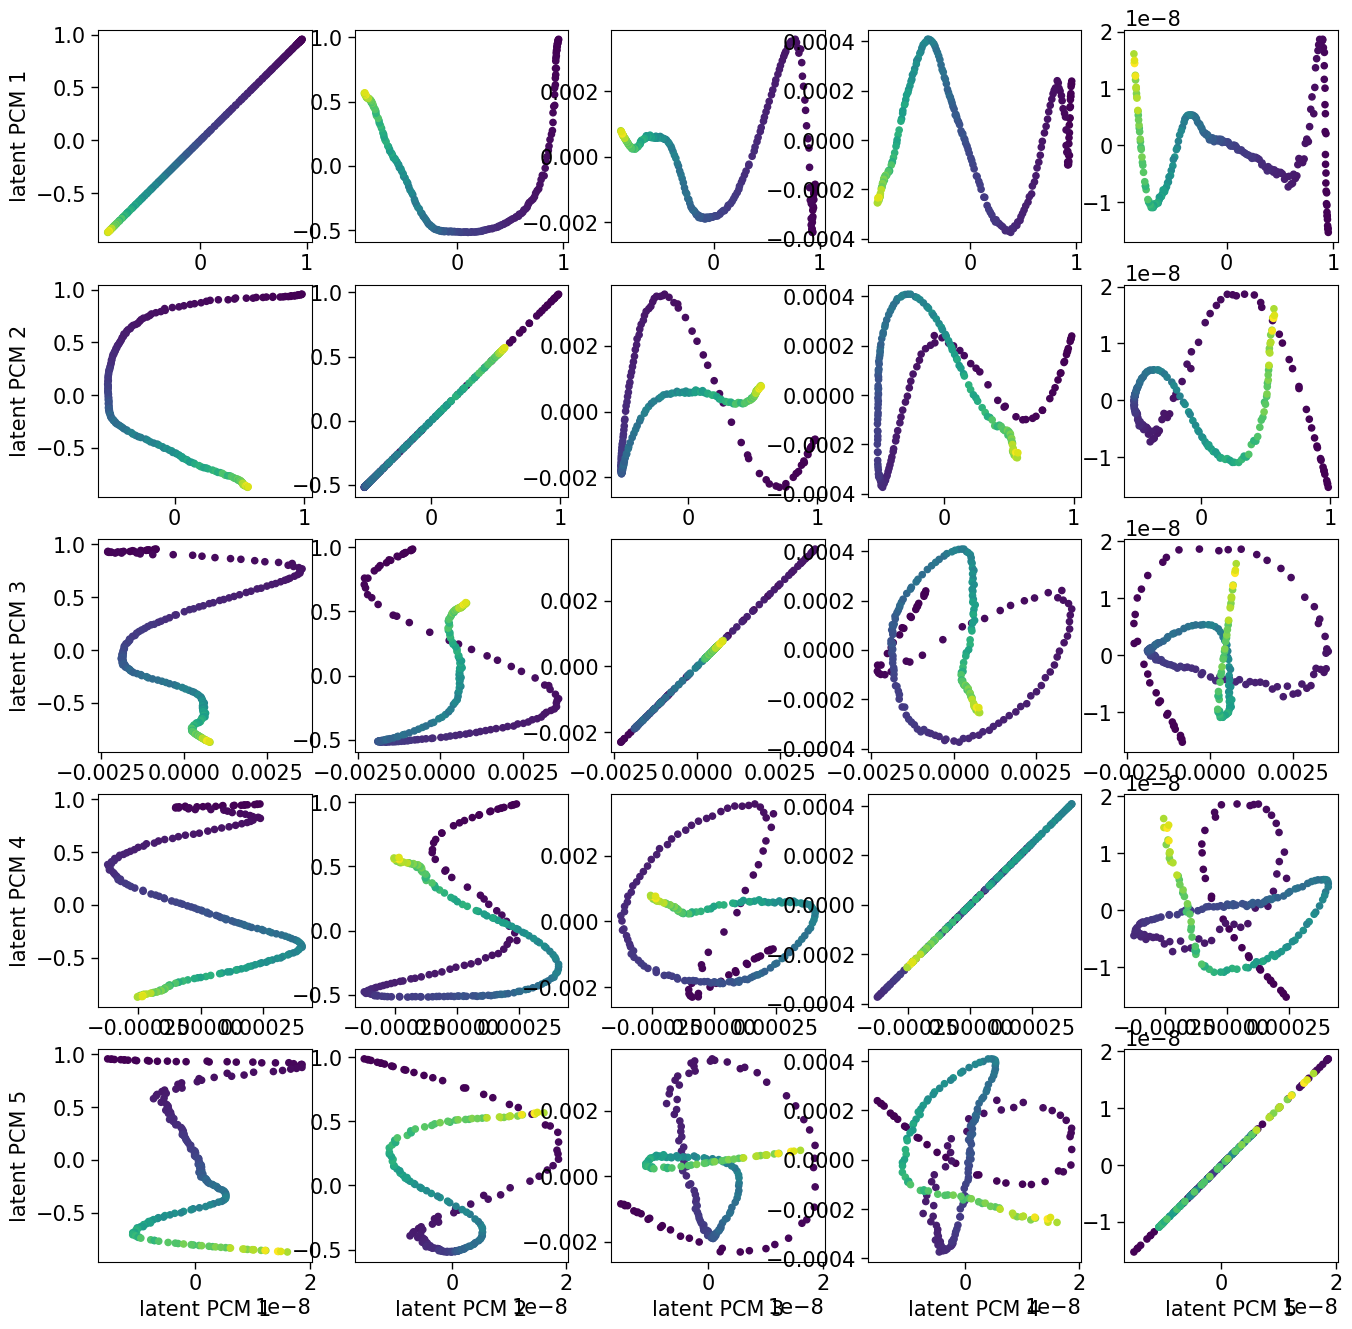

In [63]:
# PCA of latents: 
pca_2D = PCA(n_components=latent_size_single)
latents_single_pca = pca_2D.fit_transform(latents_single)

# Color map for plots
c_single = np.linalg.norm(inputs_single, axis=1)

# Figure
fig, ax = plt.subplots(latent_size_single,latent_size_single, figsize=(16,16))

for i in range(0,latent_size_single):
    for j in range(0,latent_size_single):
        latent2D_2 = ax[i][j].scatter(latents_single_pca[0:199,i], latents_single_pca[0:199,j], marker='.', c=c_single, s=80)
        if (i==latent_size_single-1):
            ax[latent_size_single-1][j].set_xlabel('latent PCM '+str(j+1),size=15)
    ax[i][0].set_ylabel('latent PCM '+str(i+1),size=15)




In [9]:
# pca_2D = PCA(n_components=5)
# latents1_pca = pca_2D.fit_transform(latents)
# latents2_pca = pca_2D.fit_transform(latents2)
# latents3_pca = pca_2D.fit_transform(latents3)

# c = np.linalg.norm(inputs, axis=1)
# c = inputs3[:,1]

# fig, ax3 = plt.subplots(3,figsize=(8,16))
# ax3[0].scatter(latents3_pca[:,0], latents3_pca[:,1], marker='.', c=c, s=80)
# ax3[1].scatter(latents1_pca[:,0], latents1_pca[:,1], marker='.', c=c, s=80)
# ax3[2].scatter(latents2_pca[:,0], latents2_pca[:,1], marker='.', c=c, s=80)

# # ax.set_xlabel('latent 1',size=15)
# # ax.set_ylabel('latent 2',size=15)

# cax = fig.add_axes([0.9, 0.15, 0.01, 0.7])
    
# if cax:
#     fig.colorbar(latents_2D_data, cax=cax, orientation='vertical')
    
# fig, ax2 = plt.subplots(3,figsize=(8,16))
# ax2[0].scatter(-latents[:,0], latents[:,2], marker='.', c=c, s=80)
# ax2[1].scatter(latents2[:,0], latents2[:,1], marker='.', c=c, s=80)
# ax2[2].scatter(latents3[:,0], latents3[:,1], marker='.', c=c, s=80)

# # ax.set_xlabel('latent 1',size=15)
# # ax.set_ylabel('latent 2',size=15)

# cax = fig.add_axes([0.9, 0.15, 0.01, 0.7])
    
# if cax:
#     fig.colorbar(latents_2D_data, cax=cax, orientation='vertical')

In [4]:
0.41+0.49

0.8999999999999999

       Train \n Single AE  Test \n Single AE  Train \n NestedAE  \
count           10.000000          10.000000          10.000000   
mean             0.501000           0.528000           0.447000   
std              0.023781           0.025298           0.012737   
min              0.460000           0.490000           0.425000   
25%              0.492500           0.512500           0.437500   
50%              0.500000           0.535000           0.452500   
75%              0.517500           0.540000           0.455000   
max              0.540000           0.560000           0.460000   

       Test \n NestedAE  
count         10.000000  
mean           0.457500  
std            0.023004  
min            0.425000  
25%            0.445000  
50%            0.452500  
75%            0.466250  
max            0.500000  
Train \n Single AE    0.5000
Test \n Single AE     0.5350
Train \n NestedAE     0.4525
Test \n NestedAE      0.4525
dtype: float64


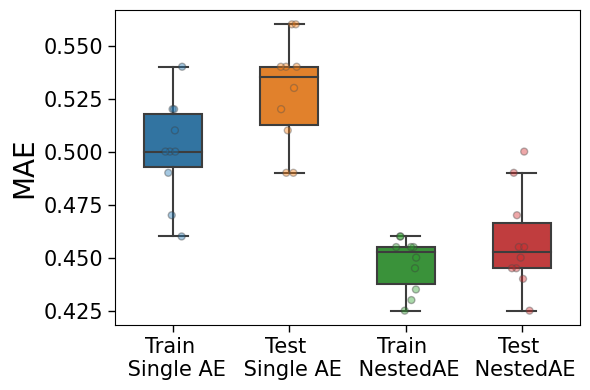

In [7]:
import sklearn
import numpy as np     
import csv 
import copy 
import random 
import pandas as pd
import pickle
import json  
import openpyxl
import itertools
import seaborn as sns

# Torch specific module imports
import torch

# Plotting libraries
import matplotlib as mpl
import matplotlib.pyplot as plt
# import seaborn as sns

# Tick parameters
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15
plt.rcParams['xtick.major.size'] = 5
plt.rcParams['xtick.major.width'] = 1
plt.rcParams['xtick.minor.size'] = 5
plt.rcParams['xtick.minor.width'] = 1
plt.rcParams['ytick.major.size'] = 5
plt.rcParams['ytick.major.width'] = 1
plt.rcParams['ytick.minor.size'] = 5
plt.rcParams['ytick.minor.width'] = 1

plt.rcParams['axes.labelsize'] = 20
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['legend.fontsize'] = 15

funcaddnoise_ae1 = [0.42,0.41,0.43,0.42,0.42,0.41,0.41,0.41,0.41,0.42]
funcaddnoise_ae2 = [0.48,0.44,0.49,0.49,0.5,0.45,0.50,0.50,0.46,0.47]
funcaddnoise = [0.5*sum(x) for x in zip(funcaddnoise_ae1,funcaddnoise_ae2)] 
funcaddnoise_single = [0.5,0.47,0.46,0.51,0.52,0.50,0.50,0.54,0.52,0.49]

funcaddnoise_ae1_val = [0.40,0.43,0.43,0.42,0.40,0.43,0.44,0.45,0.42,0.42]
funcaddnoise_ae2_val = [0.49,0.47,0.57,0.47,0.45,0.45,0.54,0.46,0.49,0.52]
funcaddnoise_val = [0.5*sum(x) for x in zip(funcaddnoise_ae1_val,funcaddnoise_ae2_val)] 
funcaddnoise_single_val = [0.52,0.49,0.54,0.51,0.49,0.54,0.56,0.53,0.56,0.54]

iter_to_reach_max = [funcaddnoise_single, funcaddnoise_single_val, funcaddnoise, funcaddnoise_val]  
method_list= ['Train \n Single AE', 'Test \n Single AE', 'Train \n NestedAE', 'Test \n NestedAE']
df_data = pd.DataFrame({x: y for x, y in zip(method_list, iter_to_reach_max)})
df_plot = pd.melt(df_data, value_vars=method_list, var_name='method')

fig, ax = plt.subplots(1,1)
ax = sns.boxplot(x='method', y='value', data=df_plot, showfliers = False, width=0.5)
ax = sns.stripplot(x='method', y='value', data=df_plot, hue='method', legend=False,
                   alpha=.4, linewidth=1, jitter=0.1)

# ax.set_ylim((0, 100))
plt.gcf().set_size_inches((6,4))
# plt.title(f'k = {k}')
ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
plt.gca().set_xlabel('')
plt.gca().set_ylabel('MAE', fontsize=20)
print(df_data.describe())
print(df_data.median())

# plt.gca().set_xticklabels(plt.gca().get_xticklabels(), fontsize=15, rotation=45)
# plt.gca().set_xticklabels(['25 X 25', '50 X 50'], fontsize=20)

plt.tight_layout()
fig.patch.set_facecolor('white')
plt.savefig('/Users/maitreyeesharma/WORKSPACE/Publications/2023/q46/figs/synthetic_dataset/noisyF_error.pdf', bbox_inches='tight')



       Train NestedAE  Train Single AE  Test NestedAE  Test Single AE
count        5.000000         5.000000       5.000000        5.000000
mean         0.215000         0.212000       0.213000        0.206000
std          0.007906         0.016432       0.034928        0.035777
min          0.205000         0.200000       0.170000        0.170000
25%          0.210000         0.200000       0.190000        0.180000
50%          0.215000         0.210000       0.210000        0.200000
75%          0.220000         0.210000       0.240000        0.220000
max          0.225000         0.240000       0.255000        0.260000
Train NestedAE     0.215
Train Single AE    0.210
Test NestedAE      0.210
Test Single AE     0.200
dtype: float64


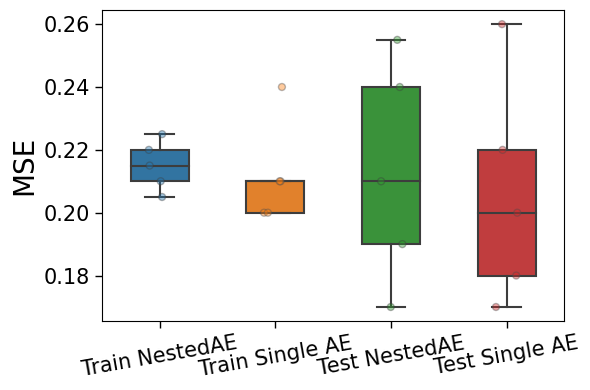

In [20]:
import sklearn
import numpy as np     
import csv 
import copy 
import random 
import pandas as pd
import pickle
import json  
import openpyxl
import itertools
import seaborn as sns

# Torch specific module imports
import torch

# Plotting libraries
import matplotlib as mpl
import matplotlib.pyplot as plt
# import seaborn as sns

# Tick parameters
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15
plt.rcParams['xtick.major.size'] = 5
plt.rcParams['xtick.major.width'] = 1
plt.rcParams['xtick.minor.size'] = 5
plt.rcParams['xtick.minor.width'] = 1
plt.rcParams['ytick.major.size'] = 5
plt.rcParams['ytick.major.width'] = 1
plt.rcParams['ytick.minor.size'] = 5
plt.rcParams['ytick.minor.width'] = 1

plt.rcParams['axes.labelsize'] = 20
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['legend.fontsize'] = 15

nestedF_ae1 = [0.21,0.20,0.22,0.21,0.20]
nestedF_ae2 = [0.22,0.21,0.23,0.21,0.24]
nestedF = [0.5*sum(x) for x in zip(nestedF_ae1,nestedF_ae2)] 
nestedF_single = [0.2,0.2,0.24,0.21,0.21]

nestedF_ae1_val = [0.26,0.23,0.18,0.15,0.16]
nestedF_ae2_val = [0.25,0.19,0.3,0.19,0.22]
nestedF_val = [0.5*sum(x) for x in zip(nestedF_ae1_val,nestedF_ae2_val)] 
nestedF_single_val = [0.22,0.2,0.26,0.18,0.17]

iter_to_reach_max = [nestedF, nestedF_single, nestedF_val, nestedF_single_val]  
method_list= ['Train NestedAE', 'Train Single AE', 'Test NestedAE', 'Test Single AE']
df_data = pd.DataFrame({x: y for x, y in zip(method_list, iter_to_reach_max)})
df_plot = pd.melt(df_data, value_vars=method_list, var_name='method')

fig, ax = plt.subplots(1,1)
ax = sns.boxplot(x='method', y='value', data=df_plot, showfliers = False, width=0.5)
ax = sns.stripplot(x='method', y='value', data=df_plot, hue='method', legend=False,
                   alpha=.4, linewidth=1, jitter=0.1)

# ax.set_ylim((0, 100))
plt.gcf().set_size_inches((6,4))
# plt.title(f'k = {k}')
ax.set_xticklabels(ax.get_xticklabels(),rotation=10)
plt.gca().set_xlabel('')
plt.gca().set_ylabel('MSE', fontsize=20)
print(df_data.describe())
print(df_data.median())

# plt.gca().set_xticklabels(plt.gca().get_xticklabels(), fontsize=15, rotation=45)
# plt.gca().set_xticklabels(['25 X 25', '50 X 50'], fontsize=20)

plt.tight_layout()
fig.patch.set_facecolor('white')
# plt.savefig('../figures/normalized_RF_score_simulation_reads_results.png', bbox_inches='tight')



       Train \n NestedAE  Train \n Single AE  Test \n NestedAE  \
count          10.000000           10.000000         10.000000   
mean            0.220500            0.271000          0.222000   
std             0.018326            0.028067          0.027203   
min             0.185000            0.230000          0.175000   
25%             0.212500            0.260000          0.201250   
50%             0.227500            0.265000          0.232500   
75%             0.233750            0.300000          0.235000   
max             0.240000            0.300000          0.265000   

       Test \n Single AE  
count          10.000000  
mean            0.275000  
std             0.039511  
min             0.200000  
25%             0.270000  
50%             0.290000  
75%             0.300000  
max             0.310000  
Train \n NestedAE     0.2275
Train \n Single AE    0.2650
Test \n NestedAE      0.2325
Test \n Single AE     0.2900
dtype: float64


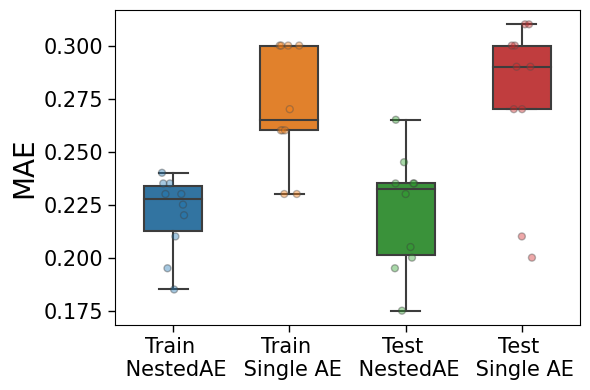

In [3]:
import sklearn
import numpy as np     
import csv 
import copy 
import random 
import pandas as pd
import pickle
import json  
import openpyxl
import itertools
import seaborn as sns

# Torch specific module imports
import torch

# Plotting libraries
import matplotlib as mpl
import matplotlib.pyplot as plt
# import seaborn as sns

# Tick parameters
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15
plt.rcParams['xtick.major.size'] = 5
plt.rcParams['xtick.major.width'] = 1
plt.rcParams['xtick.minor.size'] = 5
plt.rcParams['xtick.minor.width'] = 1
plt.rcParams['ytick.major.size'] = 5
plt.rcParams['ytick.major.width'] = 1
plt.rcParams['ytick.minor.size'] = 5
plt.rcParams['ytick.minor.width'] = 1

plt.rcParams['axes.labelsize'] = 20
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['legend.fontsize'] = 15

nestedF_ae1 = [0.21,0.20,0.22,0.21,0.20,0.21,0.21,0.23,0.18,0.17]
nestedF_ae2 = [0.26,0.22,0.25,0.27,0.26,0.23,0.24,0.23,0.19,0.22]
nestedF = [0.5*sum(x) for x in zip(nestedF_ae1,nestedF_ae2)] 
nestedF_single = [0.3,0.3,0.23,0.3,0.26,0.23,0.26,0.30,0.27,0.26]

nestedF_ae1_val = [0.26,0.23,0.18,0.14,0.16,0.19,0.23,0.25,0.21,0.21]
nestedF_ae2_val = [0.27,0.24,0.21,0.21,0.24,0.22,0.24,0.24,0.25,0.26]
nestedF_val = [0.5*sum(x) for x in zip(nestedF_ae1_val,nestedF_ae2_val)] 
nestedF_single_val = [0.31,0.31,0.27,0.27,0.21,0.20,0.30,0.29,0.29,0.30]

iter_to_reach_max = [nestedF, nestedF_single, nestedF_val, nestedF_single_val]  
method_list= ['Train \n NestedAE', 'Train \n Single AE', 'Test \n NestedAE', 'Test \n Single AE']
df_data = pd.DataFrame({x: y for x, y in zip(method_list, iter_to_reach_max)})
df_plot = pd.melt(df_data, value_vars=method_list, var_name='method')

fig, ax = plt.subplots(1,1)
ax = sns.boxplot(x='method', y='value', data=df_plot, showfliers = False, width=0.5)
ax = sns.stripplot(x='method', y='value', data=df_plot, hue='method', legend=False,
                   alpha=.4, linewidth=1, jitter=0.1)

# ax.set_ylim((0, 100))
plt.gcf().set_size_inches((6,4))
# plt.title(f'k = {k}')
ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
plt.gca().set_xlabel('')
plt.gca().set_ylabel('MAE', fontsize=20)
print(df_data.describe())
print(df_data.median())

# plt.gca().set_xticklabels(plt.gca().get_xticklabels(), fontsize=15, rotation=45)
# plt.gca().set_xticklabels(['25 X 25', '50 X 50'], fontsize=20)

plt.tight_layout()
fig.patch.set_facecolor('white')
# plt.savefig('/Users/maitreyeesharma/WORKSPACE/Publications/2023/q46/figs/synthetic_dataset/F_error.pdf', bbox_inches='tight')


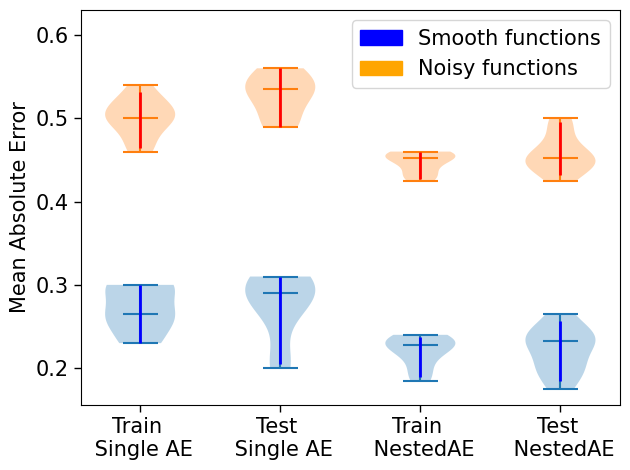

In [44]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

# Tick parameters
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15
plt.rcParams['xtick.major.size'] = 5
plt.rcParams['xtick.major.width'] = 1
plt.rcParams['xtick.minor.size'] = 5
plt.rcParams['xtick.minor.width'] = 1
plt.rcParams['ytick.major.size'] = 5
plt.rcParams['ytick.major.width'] = 1
plt.rcParams['ytick.minor.size'] = 5
plt.rcParams['ytick.minor.width'] = 1

plt.rcParams['axes.labelsize'] = 20
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['legend.fontsize'] = 15

funcaddnoise_ae1 = [0.42,0.41,0.43,0.42,0.42,0.41,0.41,0.41,0.41,0.42]
funcaddnoise_ae2 = [0.48,0.44,0.49,0.49,0.5,0.45,0.50,0.50,0.46,0.47]
funcaddnoise = [0.5*sum(x) for x in zip(funcaddnoise_ae1,funcaddnoise_ae2)] 
funcaddnoise_single = [0.5,0.47,0.46,0.51,0.52,0.50,0.50,0.54,0.52,0.49]

funcaddnoise_ae1_val = [0.40,0.43,0.43,0.42,0.40,0.43,0.44,0.45,0.42,0.42]
funcaddnoise_ae2_val = [0.49,0.47,0.57,0.47,0.45,0.45,0.54,0.46,0.49,0.52]
funcaddnoise_val = [0.5*sum(x) for x in zip(funcaddnoise_ae1_val,funcaddnoise_ae2_val)] 
funcaddnoise_single_val = [0.52,0.49,0.54,0.51,0.49,0.54,0.56,0.53,0.56,0.54]

nestedF_ae1 = [0.21,0.20,0.22,0.21,0.20,0.21,0.21,0.23,0.18,0.17]
nestedF_ae2 = [0.26,0.22,0.25,0.27,0.26,0.23,0.24,0.23,0.19,0.22]
nestedF = [0.5*sum(x) for x in zip(nestedF_ae1,nestedF_ae2)] 
nestedF_single = [0.3,0.3,0.23,0.3,0.26,0.23,0.26,0.30,0.27,0.26]

nestedF_ae1_val = [0.26,0.23,0.18,0.14,0.16,0.19,0.23,0.25,0.21,0.21]
nestedF_ae2_val = [0.27,0.24,0.21,0.21,0.24,0.22,0.24,0.24,0.25,0.26]
nestedF_val = [0.5*sum(x) for x in zip(nestedF_ae1_val,nestedF_ae2_val)] 
nestedF_single_val = [0.31,0.31,0.27,0.27,0.21,0.20,0.30,0.29,0.29,0.30]

iter_to_reach_max_ana = [ nestedF_single, nestedF_single_val, nestedF, nestedF_val]  

iter_to_reach_max_noisy = [funcaddnoise_single, funcaddnoise_single_val, funcaddnoise, funcaddnoise_val]  

# Create a figure and axis
fig, ax = plt.subplots()

# Create vertical violin plots with whiskers at 95% confidence intervals
violin_parts = ax.violinplot(iter_to_reach_max_ana, vert=True, showmedians=True)
violin_parts = ax.violinplot(iter_to_reach_max_noisy, vert=True, showmedians=True)

# Calculate and plot whiskers at 95% confidence interval for each list
def plot_whiskers(data, position, color):
    whisker_low = np.percentile(data, 5)
    whisker_high = np.percentile(data, 95)
    ax.vlines(position, whisker_low, whisker_high, color=color, linewidth=2)

for i, data in enumerate(iter_to_reach_max_ana):
    plot_whiskers(data, i + 1, 'blue')

for i, data in enumerate(iter_to_reach_max_noisy):
    plot_whiskers(data, i + 1, 'red')

method_list= ['Train \n Single AE', 'Test \n Single AE', 'Train \n NestedAE', 'Test \n NestedAE']
# Set x-axis ticks and labels
ax.set_xticks(np.arange(1, 5))
ax.set_xticklabels(method_list,size=15)
ax.set_ylim([None, 0.63])

# Create a custom legend using proxy artists
legend_elements = [
    Patch(facecolor='blue', edgecolor='blue', label='Smooth functions'),
    Patch(facecolor='orange', edgecolor='orange', label='Noisy functions')
]
ax.legend(handles=legend_elements, loc='upper right')

# Set labels and title
ax.set_xlabel('')
ax.set_ylabel('Mean Absolute Error',size=15)

plt.tight_layout()
#plt.savefig('/Users/maitreyeesharma/WORKSPACE/Publications/2023/q46/figs/synthetic_dataset/syntheticD_performance.pdf', bbox_inches='tight')


In [26]:
nestedF, nestedF_single

([0.235,
  0.21000000000000002,
  0.235,
  0.24,
  0.23,
  0.22,
  0.22499999999999998,
  0.23,
  0.185,
  0.195],
 [0.3, 0.3, 0.23, 0.3, 0.26, 0.23, 0.26, 0.3, 0.27, 0.26])